In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pollution = pd.read_excel('PM2.5climate.xlsx')
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


The top 5 rows shows that the target variable (pm2.5) has NaN (missing) values. This helps us understand that we need to look for missing values in our dataset, especially the target variable.

---

## Project Description

The data describes the pollution level depending on various air quality features. There are 43,824 observations with 13 columns (including the target variable). We intend to carry out regression on this dataset to predict the pollution level (PM2.5 level) through various air quality features.

The features are as follows:
1) No: row number (Quantitative)

2) Year: year of data (Quantitative)

3) Month: month of data (Quantitative)

4) Day: day of the data (Quantitative)

5) Hour: hour of data (Quantitative)

6) PM2.5: PM2.5 concentration in micrograms per cubic meter of air (Quantitative)

7) DEWP: dew point; atmospheric temperature below which water droplets begin to condense varies based on pressure and humidity in celsius(Quantitative)

8) TEMP: temperature in celsius(Quantitative)

9) PRES: air pressure in pascals (Quantitative)

10) cbwd: combined wind direction (Quantitative)

11) lws: cumulated wind speed in meters/second(Quantitative)

12) ls: cumulated hours of snow (Quantitative)

13) lr: cumulated hours of rain (Quantitative)

The dataset is already preprocessed to some degree (it is not raw data). According to the description, there are a few missing values in the target variable (which will be dealt with in the project cleaning).

---

## Basic Exploration of Dataset

In [3]:
pollution

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
pollution.shape

(43824, 13)

In [9]:
pollution.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

There are 43,824 rows with 13 features, as described above. This is a large dataset.

In [5]:
pollution.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


All the variables are numerical and thus can be described.

The column 'No' does not have any real implications since it gives the row number (which can be provided by the index), hence it will probably be removed.

The year column is interesting because it gives the "mean" year which might not help in this context. We might decide to categorize the variable or to create dummy variables or simply remove the variable.

Similarly, the month, day and hour variables are interesting and we may use the month and day variables because it will allow us to understand the months and days in which there are high levels of pollution. However, the hour variable is extrmely detailed and may end up causing confusion or bias.

pm2.5 is our target variable that describes the levels of fine particulate matter in the air which is hazardous for people's health in micrograms per cubic meter of air. The mean level in Beijing is 98.6 micrograms per cubic meter and the median is 72 micrograms per cubic unit. Looking at this large difference we can assume that there might be outliers in this variable.

DEWP and TEMP are in degrees celsius. DEWP has a mean value of 1.82 degrees celsius and a median of 2 degrees. It does not seem like there are many or any outliers. TEMP has a mean of 12.45 degrees with a median of 14 degrees. While there are some differences between teh mean and median, there is not a large difference indicating few outliers.

PRES is the air pressure in pascals. It has a mean of 1016.45 pascals and a median of 1016 pascals. This is approximately the same values (no indication of outliers).

lws is the cumulated wind speed in meters per second. The mean and median are close to each other with a difference of 2 units. 

Similarly, ls and lr record the cumulated hours of snow and rain, respectively. The values of the mean and median for both of these variables are close to each other indicating that there are no outliers (or close to none).

Let us now look at the unique values of the categorical variable:

In [6]:
pollution['cbwd'].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

There is a value called 'cv' which, upon reserach, has been found to be equivalent to SW (Southwest). Hence, we will change that once we start cleaning the data.

Let us now look at the types of the data points:

In [7]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


Through this table, we can see that most variables are integars with three variables as floating numbers (pm2.5, TEMP, and PRES) and one categorical variable of type 'object' (cbwd). 

It can also be seen that the target variable has missing values which will need to be dealt in the data cleaning process.

---

## Missing Values

In [10]:
pollution.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

Only one variable, pm2.5, has missing values. There are approximately 2000 missing rows.

Let us look at visualizations of the features to understand if there are any outliers and to see the distribution follows any pattern.

---

## Distribution of Features

### year

In [21]:
pollution['year'].value_counts()

2012    8784
2014    8760
2013    8760
2011    8760
2010    8760
Name: year, dtype: int64

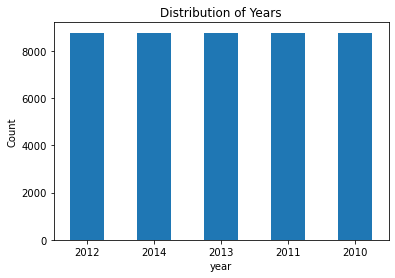

In [56]:
pollution['year'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Years')
plt.xlabel('year')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

Looking at this plot and the value counts table, one can see that there are nearly similar amount of observations for each year. This shows a uniform distribution and tells us that the observations are equitable according to year.

### month

In [28]:
pollution['month'].value_counts()

12    3720
10    3720
8     3720
7     3720
5     3720
3     3720
1     3720
11    3600
9     3600
6     3600
4     3600
2     3384
Name: month, dtype: int64

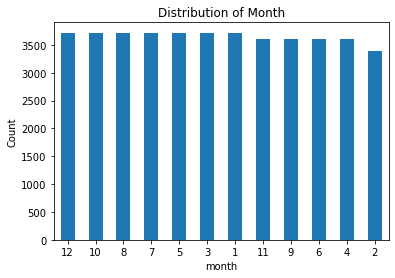

In [57]:
pollution['month'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Month')
plt.xlabel('month')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

This distribution is similar to the distribution to the 'year' variable. The distribution is similar (or close) to the distribution of month. All months (across all years) have the same number of observations.

This is good bcecause we do not need to upscale the data to account for missing observations for the month.

In [36]:
tab1 = pollution.groupby(['year', 'month'])
tab1['month'].value_counts()

year  month  month
2010  1      1        744
      2      2        672
      3      3        744
      4      4        720
      5      5        744
      6      6        720
      7      7        744
      8      8        744
      9      9        720
      10     10       744
      11     11       720
      12     12       744
2011  1      1        744
      2      2        672
      3      3        744
      4      4        720
      5      5        744
      6      6        720
      7      7        744
      8      8        744
      9      9        720
      10     10       744
      11     11       720
      12     12       744
2012  1      1        744
      2      2        696
      3      3        744
      4      4        720
      5      5        744
      6      6        720
      7      7        744
      8      8        744
      9      9        720
      10     10       744
      11     11       720
      12     12       744
2013  1      1        744
      2      2     

This table shows that for every year's every month, there are similar amounts of rows. 

### Day

In [45]:
pollution['day'].value_counts()

16    1440
15    1440
2     1440
3     1440
4     1440
5     1440
6     1440
7     1440
8     1440
9     1440
10    1440
11    1440
12    1440
13    1440
14    1440
1     1440
17    1440
18    1440
19    1440
20    1440
21    1440
22    1440
23    1440
24    1440
25    1440
26    1440
27    1440
28    1440
29    1344
30    1320
31     840
Name: day, dtype: int64

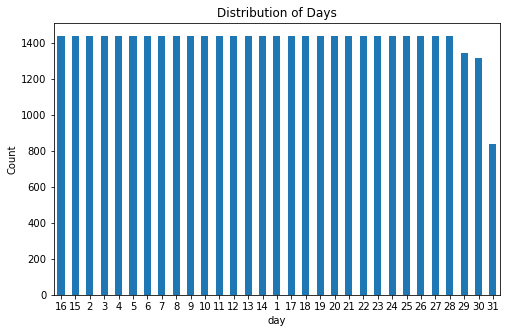

In [58]:
plt.figure(figsize = (8,5))
pollution['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Days')
plt.xlabel('day')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

The table and graph shows that most days also have similar amounts of observations. However, the 31st day of a month have the least amount of observations over all five years.

### hour

In [53]:
pollution['hour'].value_counts()

23    1826
22    1826
1     1826
2     1826
3     1826
4     1826
5     1826
6     1826
7     1826
8     1826
9     1826
10    1826
11    1826
12    1826
13    1826
14    1826
15    1826
16    1826
17    1826
18    1826
19    1826
20    1826
21    1826
0     1826
Name: hour, dtype: int64

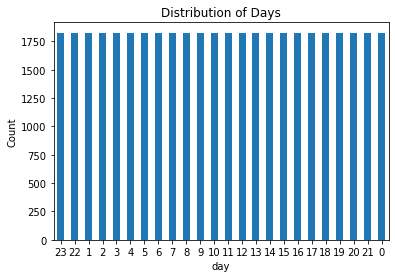

In [59]:
pollution['hour'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Days')
plt.xlabel('day')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

The table and graph shows that there are similar amounts of observations for each day of every year of every month. 

### pm2.5

In [62]:
# Understand the maximum and minimum values of the feature to understand possible values of bins
print(np.nanmax(pollution['pm2.5']))
print(np.nanmin(pollution['pm2.5']))

# np.nan is used because there are NaN values in this column.

994.0
0.0


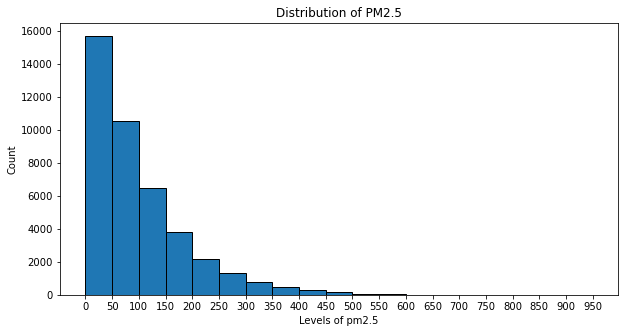

In [71]:
plt.figure(figsize = (10, 5))
plt.hist(pollution['pm2.5'], bins = range(0, 1000, 50), ec = 'black')
plt.title('Distribution of PM2.5')
plt.xticks(range(0, 1000, 50))
plt.xlabel('Levels of pm2.5')
plt.ylabel('Count')
plt.show()

This histogram shows that PM2.5, the target variable, is right-skewed. It appears that the air pollution was usually at the lower levels of 0 to 50 micrograms per cubic meter of air. The count of the levels of pm2.5 decreases as the level of pm2.5 increases. 

This is good because it shows that over a period of 5 years, there are generally lower levels of pm2.5 which is a good indication for people's health.

### DEWP

In [72]:
# Understand the maximum and minimum values of the feature to understand possible values of bins
print(max(pollution['DEWP']))
print(min(pollution['DEWP']))

28
-40


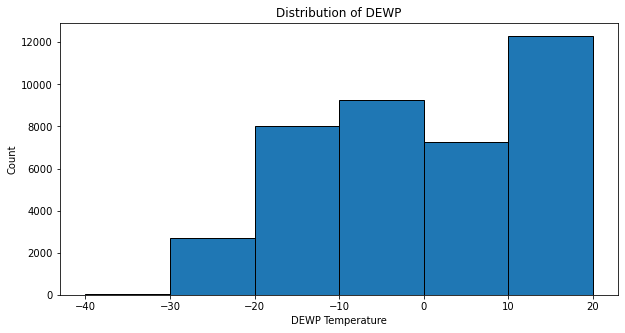

In [73]:
plt.figure(figsize = (10, 5))
plt.hist(pollution['DEWP'], bins = range(-40, 30, 10), ec = 'black')
plt.title('Distribution of DEWP')
plt.xticks(range(-40, 30, 10))
plt.xlabel('DEWP Temperature')
plt.ylabel('Count')
plt.show()

This histogram shows us the distribution of the variable DEWP (dew point temperature). While the distribution looks slightly left-skewed, we believe that it is not very left-skewed and it not of large concern. 

It does appear that most common dew point temperature is between 10 to 20 degrees celsius. However, the other bins of temperatures also occus pretty commonly. The least common bin(s) of temperature is -40 to -20 degrees of celsius.

### PRES

In [74]:
# Understand the maximum and minimum values of the feature to understand possible values of bins
print(max(pollution['PRES']))
print(min(pollution['PRES']))

1046.0
991.0


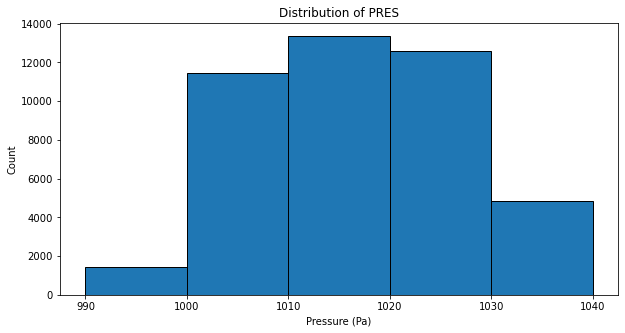

In [75]:
plt.figure(figsize = (10, 5))
plt.hist(pollution['PRES'], bins = range(990, 1050, 10), ec = 'black')
plt.title('Distribution of PRES')
plt.xticks(range(990, 1050, 10))
plt.xlabel('Pressure (Pa)')
plt.ylabel('Count')
plt.show()

This histogram shows that the distribution of the pressure is a normal distribution. This is good because it meets the normality requirement of linear regression. The most common values of pressure are 1000 to 1030 pascals.

### cbwd

In [79]:
pollution['cbwd'].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

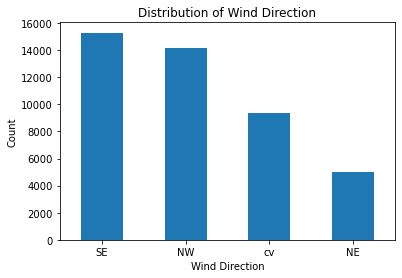

In [78]:
pollution['cbwd'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

This bar graph shows that most of the observation records of pm2.5 levels have a wind direction of south east. The least common wind direction is north east.

There is a bar labeled 'cv' which, upon research, has been found to be equivalent to south west.

### Iws

In [81]:
# Understand the maximum and minimum values of the feature to understand possible values of bins
print(max(pollution['Iws']))
print(min(pollution['Iws']))

585.6
0.45


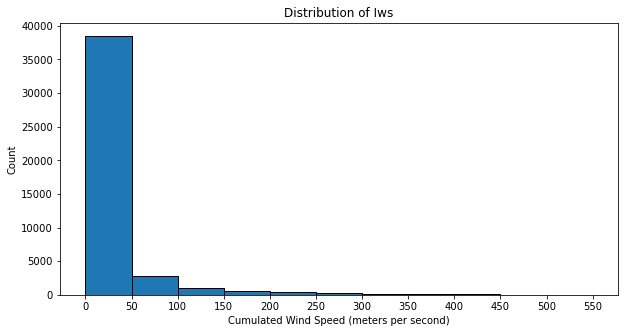

In [83]:
plt.figure(figsize = (10, 5))
plt.hist(pollution['Iws'], bins = range(0, 600, 50), ec = 'black')
plt.title('Distribution of Iws')
plt.xticks(range(0, 600, 50))
plt.xlabel('Cumulated Wind Speed (meters per second)')
plt.ylabel('Count')
plt.show()

This histogram shows that the most common value of the cumulated wind speed is between 0 and 50 meters per second. The frequency of each passing bin of wind speed decreases. This distribution is clearly right-skewed. 

### Is

In [84]:
# Understand the maximum and minimum values of the feature to understand possible values of bins
print(max(pollution['Is']))
print(min(pollution['Is']))

27
0


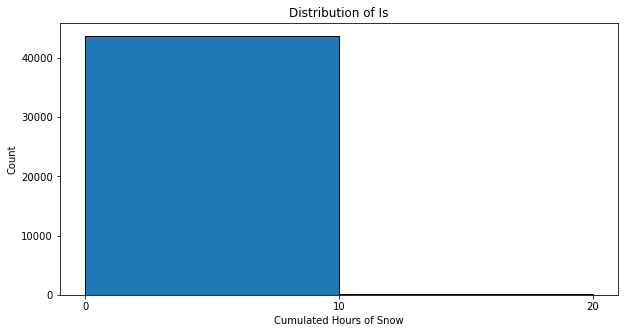

In [85]:
plt.figure(figsize = (10, 5))
plt.hist(pollution['Is'], bins = range(0, 30, 10), ec = 'black')
plt.title('Distribution of Is')
plt.xticks(range(0, 30, 10))
plt.xlabel('Cumulated Hours of Snow')
plt.ylabel('Count')
plt.show()

This histogram describes the distribution of the cumulated hours of snow over the five years. While it can be said that the distribution is right-skewed, there is only one prominent bar and this histogram appears to be more like a single bar chart. The most common amount of cumulated hours of snow is between 0 and 10 hours.

We can decide to remove any values of Is that have values greater than 10 hours. This graph also shows that in Beijing, it snows for a cumulative amount of 10 hours most of the time.

### Ir

In [86]:
# Understand the maximum and minimum values of the feature to understand possible values of bins
print(max(pollution['Ir']))
print(min(pollution['Ir']))

36
0


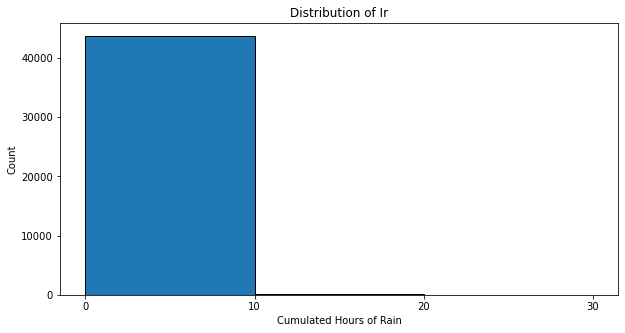

In [87]:
plt.figure(figsize = (10, 5))
plt.hist(pollution['Is'], bins = range(0, 40, 10), ec = 'black')
plt.title('Distribution of Ir')
plt.xticks(range(0, 40, 10))
plt.xlabel('Cumulated Hours of Rain')
plt.ylabel('Count')
plt.show()

This histogram describes the distribution of the cumulated hours of rain over the five years. While it can be said that the distribution is right-skewed, there is only one prominent bar and this histogram appears to be more like a single bar chart. The most common cumulated hours of rain is between 0 and 10 hours.

We can decide to remove any values of Ir that have values greater than 10 hours. This graph also shows that in Beijing, it rains for a cumulative amount of 10 hours most of the time.

---

## Correlation